In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# fruit dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

### Cross-validation with a K-NN classifier

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.to_numpy()
y = y_fruits_2d.to_numpy()

cv_score = cross_val_score(knc, X, y)

print(f'Cross-validation scores (3-fold): {cv_score}')
print(f'Mean cross-validation score (3-fold): {np.mean(cv_score)}')

Cross-validation scores (3-fold): [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validation score (3-fold): 0.7969696969696971


Validation curve 

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3,3,4)
train_scores, test_scores = validation_curve(SVC(), X, y,param_name = 'gamma',
param_range = param_range, cv = 5)

print(train_scores,'\n')
print(test_scores)

[[0.46808511 0.40425532 0.40425532 0.34042553 0.33333333]
 [0.82978723 0.78723404 0.76595745 0.74468085 0.75      ]
 [0.87234043 0.89361702 0.89361702 0.89361702 0.85416667]
 [0.9787234  1.         0.9787234  1.         0.97916667]] 

[[0.58333333 0.33333333 0.33333333 0.25       0.27272727]
 [0.83333333 0.66666667 0.66666667 0.75       0.72727273]
 [0.41666667 0.66666667 0.83333333 0.83333333 0.81818182]
 [0.33333333 0.33333333 0.25       0.33333333 0.36363636]]


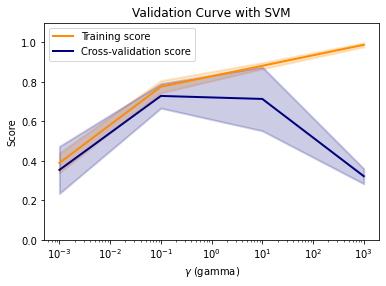

In [6]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()